* 박조은 강사님 inflearn강의  
단 두장의 문서로 데이터 분석과 시각화 뽀개기 
출처: https://www.inflearn.com/course/%ED%8C%90%EB%8B%A4%EC%8A%A4-pandas/lecture/20846?tab=note

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

## Bar plot

In [2]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000))
ts.head()

2000-01-01   -0.617728
2000-01-02   -1.594283
2000-01-03   -0.976857
2000-01-04   -1.074680
2000-01-05   -1.651262
Freq: D, dtype: float64

In [3]:
df = pd.DataFrame(np.random.randn(1000,4),
              index=ts.index, columns=list('ABCD'))
df.head(6)

,A,B,C,D
2000-01-01,-0.421977,-0.332851,-0.250162,0.458997
2000-01-02,0.701411,-1.282625,-0.366575,0.303380
2000-01-03,-0.704936,0.702002,0.713748,-0.097001
2000-01-04,0.519316,0.790230,0.125470,0.164014
2000-01-05,-0.773591,-2.394382,0.412435,-2.350902
2000-01-06,0.504743,-0.566777,0.536509,0.733492


In [4]:
df.tail(2)

,A,B,C,D
2002-09-25,0.122593,-1.020147,-0.405661,0.494986
2002-09-26,0.879497,-1.017336,-1.107432,1.504302


In [5]:
df.iloc[5]

A    0.504743
B   -0.566777
C    0.536509
D    0.733492
Name: 2000-01-06 00:00:00, dtype: float64

<AxesSubplot:>

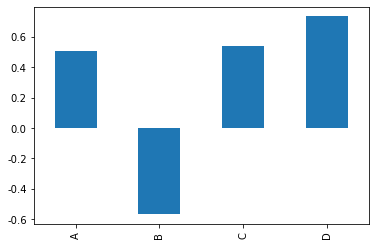

In [6]:
df.iloc[5].plot(kind='bar')

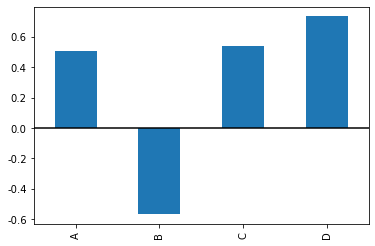

In [10]:
df.iloc[5].plot.bar()
plt.axhline(0, color='k')

In [12]:
df2 = pd.DataFrame(np.random.rand(10,4), columns=['a','b','c','d'])
df2.head(3)

,a,b,c,d
0,0.598045,0.350601,0.448117,0.750144
1,0.602029,0.945510,0.657059,0.217329
2,0.116705,0.851528,0.345547,0.596137


<AxesSubplot:>

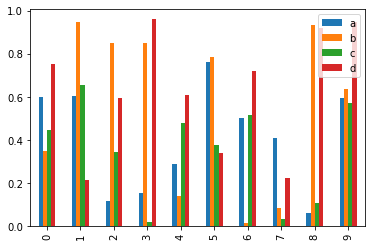

In [13]:
df2.plot.bar()

<AxesSubplot:>

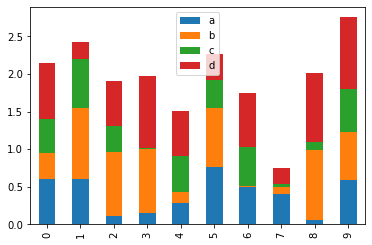

In [15]:
df2.plot.bar(stacked=True)  #누적해서 그래프 그리기

<AxesSubplot:>

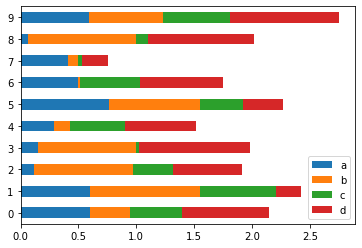

In [16]:
df2.plot.barh(stacked=True)   # barh: x축과 y축이 뒤집힌 그래프 그리기

## hist plot
### Historam 

파이썬 데이터 시각화 히스토그램과 도수분포표 이해하기, 막대그래프 vs 히스토그램 차이 이해하기
* 공식문서 : https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms


#### 도수분포표 vs 히스토그램",
* 도수분포표 : 특정 구간에 속하는 자료의 개수를 표현 ([도수 분포 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%8F%84%EC%88%98_%EB%B6%84%ED%8F%AC))
* 히스토그램 : 도수분포표를 시각화하여 막대그래프로 표현, 하지만 bar plot과는 다름 ([히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8))
    
#### 막대그래프 vs 히스토그램 (bar plot vs hist plot)
* bar plot : 표현 값에 비례하여 높이와 길이를 지닌 직사각형 막대로 범주형 데이터를 표현하는 차트나 그래프, 합계, 평균 등의 수치를 시각화 ([막대 그래프 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%A7%89%EB%8C%80_%EA%B7%B8%EB%9E%98%ED%94%84)
* hist plot : 구간별 빈도수를 표현

#### 히스토그램 vs 정규분포 (hist plot vs density plot)
* hist plot : 구간별 빈도수
* density plot : 확률 밀도 함수 - 확률 변수의 밀도를 표현 ([정규 분포 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%EB%B6%84%ED%8F%AC)

In [18]:
df4 = pd.DataFrame({'a':np.random.randn(1000)+1,
                   'b':np.random.randn(1000),
                   'c':np.random.randn(1000)-1},
                  columns=['a','b','c'])
df4.head()

,a,b,c
0,1.308548,-0.611853,-1.014523
1,0.011795,0.216562,-0.068541
2,-0.111030,0.298389,-0.474348
3,0.635458,0.105797,-0.961279
4,-0.297898,-0.353098,-0.367521


<AxesSubplot:ylabel='Frequency'>

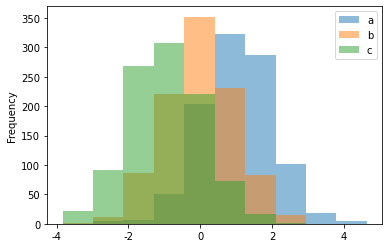

In [19]:
# bin 
df4.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

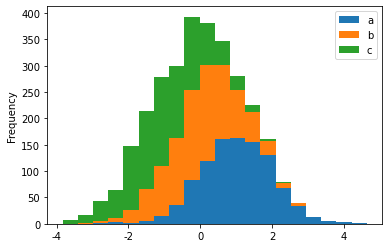

In [20]:
#stacked=True 누적
df4.plot.hist(stacked=True, bins=20)
# 

<AxesSubplot:xlabel='Frequency'>

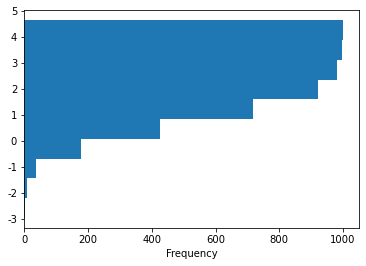

In [23]:
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

### 파이썬 판다스로 차분 diff 값을 구하고 히스토그램을 표현하기

<AxesSubplot:>

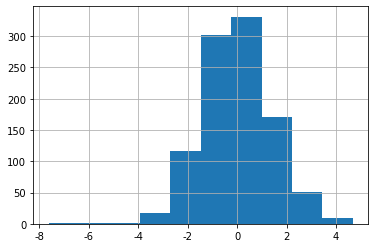

In [25]:
df4['a'].diff().hist()

In [35]:
df4['a_diff']=df4['a'].diff()
df4['a_shift'] = df4['a'].shift(1)
df4['a_minus'] = df4['a']-df4['a_shift']
df4[['a','a_shift','a_minus','a_diff']].head()

,a,a_shift,a_minus,a_diff
0,1.308548,NaN,NaN,NaN
1,0.011795,1.308548,-1.296753,-1.296753
2,-0.111030,0.011795,-0.122824,-0.122824
3,0.635458,-0.111030,0.746487,0.746487
4,-0.297898,0.635458,-0.933356,-0.933356


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

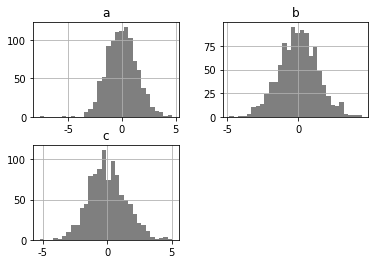

In [39]:
df4[['a','b','c']].diff().hist(color='k',alpha=0.5,bins=30)

In [50]:
data = pd.Series(np.random.randn(1000))

In [52]:
data = pd.DataFrame({'a':np.random.randn(1000),
                    'b': np.random.randint(0,4,1000)})
data.head()

,a,b
0,-1.264636,1
1,0.017722,3
2,-1.631445,2
3,0.182008,0
4,0.060659,0


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

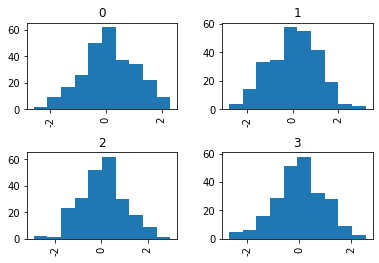

In [53]:
data['a'].hist(by=data['b'],figsize=(6,4))
#아래와 동일한 그래프를 그리는 다른 방법

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

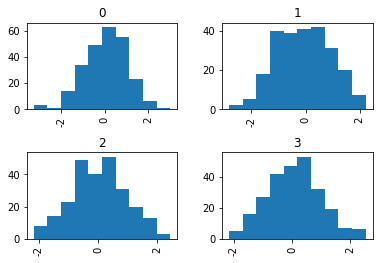

In [51]:
data.hist(by=np.random.randint(0,4,1000),figsize=(6,4))